In [2]:
import os
import sys

# ===================================================================
# Part 0: CONFIGURE YOUR PATHS (Verified and Correct)
# ===================================================================
DATASET_SOURCE_PATH    = "/kaggle/input/anna-wintour/clothes_tryon_dataset"
CHECKPOINT_SOURCE_PATH = "/kaggle/input/checkpoints/checkpoints"

# ===================================================================
# Part 1: Validation, Setup, and Full Patching
# ===================================================================
print("🕵️ Validating source paths...")
if not os.path.exists(DATASET_SOURCE_PATH) or not os.path.exists(CHECKPOINT_SOURCE_PATH):
    print("❌ FATAL ERROR: A source path is incorrect. Please check your Kaggle dataset names and paths.")
    sys.exit()

print("✅ Paths validated successfully!")
print("🧹 Resetting environment...")
os.chdir("/kaggle/working/")
os.system("rm -rf VITON-HD")

print("🚀 Cloning repository and installing packages...")
os.system("git clone https://github.com/shadow2496/VITON-HD.git > /dev/null 2>&1")
os.chdir("VITON-HD")
os.system("pip install -q torch torchvision opencv-python torchgeometry Pillow tqdm tensorboardX scikit-image scipy > /dev/null 2>&1")

# This section now patches BOTH folder name issues you found.
print("🩹 Patching code for 'openpose_img' and 'openpose_json'...")
os.system("sed -i 's/openpose-img/openpose_img/g' datasets.py")
os.system("sed -i 's/openpose-json/openpose_json/g' datasets.py")
print("✅ Code patched successfully.")

# ===================================================================
# Part 2: Copying Files and Running the Model
# ===================================================================
print("📂 Copying files directly for maximum stability...")
os.system("mkdir -p datasets checkpoints")
os.system(f"cp -r {DATASET_SOURCE_PATH}/* ./datasets/")
os.system(f"cp {CHECKPOINT_SOURCE_PATH}/* ./checkpoints/")
print("✅ File copy complete.")

# --- Use the filenames you want to test ---
person_image = "00057_00.jpg"
cloth_image = "00008_00.jpg"

with open("./datasets/test_one_pair.txt", "w") as f:
    f.write(f"{person_image} {cloth_image}")

print(f"✅ Created test file to try on '{cloth_image}' with model '{person_image}'")
print("\n▶️ Starting the virtual try-on process...")

os.system(f"""
python test.py \
    --name "final_vton_run" \
    --dataset_dir ./datasets \
    --dataset_list "test_one_pair.txt"
""")

print("-" * 50)
print("🎉 Process finished! Check for results in './results/final_vton_run/'")

🕵️ Validating source paths...
✅ Paths validated successfully!
🧹 Resetting environment...
🚀 Cloning repository and installing packages...
🩹 Patching code for 'openpose_img' and 'openpose_json'...
✅ Code patched successfully.
📂 Copying files directly for maximum stability...
✅ File copy complete.
✅ Created test file to try on '00008_00.jpg' with model '00057_00.jpg'

▶️ Starting the virtual try-on process...
Namespace(name='final_vton_run', batch_size=1, workers=1, load_height=1024, load_width=768, shuffle=False, dataset_dir='./datasets', dataset_mode='test', dataset_list='test_one_pair.txt', checkpoint_dir='./checkpoints/', save_dir='./results/', display_freq=1, seg_checkpoint='seg_final.pth', gmm_checkpoint='gmm_final.pth', alias_checkpoint='alias_final.pth', semantic_nc=13, init_type='xavier', init_variance=0.02, grid_size=5, norm_G='spectralaliasinstance', ngf=64, num_upsampling_layers='most')
Network [SegGenerator] was created. Total number of parameters: 34.5 million. To see the ar

Traceback (most recent call last):
  File "/kaggle/working/VITON-HD/test.py", line 155, in <module>
    main()
  File "/kaggle/working/VITON-HD/test.py", line 151, in main
    test(opt, seg, gmm, alias)
  File "/kaggle/working/VITON-HD/test.py", line 64, in test
    for i, inputs in enumerate(test_loader.data_loader):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 708, in __next__
    data = self._next_data()
           ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1480, in _next_data
    return self._process_data(data)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1505, in _process_data
    data.reraise()
  File "/usr/local/lib/python3.11/dist-packages/torch/_utils.py", line 733, in reraise
    raise exception
FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recen

--------------------------------------------------
🎉 Process finished! Check for results in './results/final_vton_run/'


In [3]:
import os

# Ensure we are in the correct directory
os.chdir("/kaggle/working/VITON-HD")

# 1. Apply the final patch for the 'image-parse-v3' folder
print("🩹 Applying final patch to look for 'image-parse-v3'...")
# This command replaces the incorrect folder name in the code.
os.system("sed -i 's|image-parse/|image-parse-v3/|g' datasets.py")
print("✅ Code patched successfully.")

# 2. Re-run the test with the same images
person_image = "00057_00.jpg"
cloth_image = "00008_00.jpg"

with open("./datasets/test_one_pair.txt", "w") as f:
    f.write(f"{person_image} {cloth_image}")

print(f"\n✅ Re-running test for '{cloth_image}' and '{person_image}'...")

os.system(f"""
python test.py \
    --name "final_vton_run" \
    --dataset_dir ./datasets \
    --dataset_list "test_one_pair.txt"
""")

print("-" * 50)
print("🎉 Process finished! Check for results in './results/final_vton_run/'")

🩹 Applying final patch to look for 'image-parse-v3'...
✅ Code patched successfully.

✅ Re-running test for '00008_00.jpg' and '00057_00.jpg'...
Namespace(name='final_vton_run', batch_size=1, workers=1, load_height=1024, load_width=768, shuffle=False, dataset_dir='./datasets', dataset_mode='test', dataset_list='test_one_pair.txt', checkpoint_dir='./checkpoints/', save_dir='./results/', display_freq=1, seg_checkpoint='seg_final.pth', gmm_checkpoint='gmm_final.pth', alias_checkpoint='alias_final.pth', semantic_nc=13, init_type='xavier', init_variance=0.02, grid_size=5, norm_G='spectralaliasinstance', ngf=64, num_upsampling_layers='most')
Network [SegGenerator] was created. Total number of parameters: 34.5 million. To see the architecture, do print(network).
Network [ALIASGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).


Traceback (most recent call last):
  File "/kaggle/working/VITON-HD/test.py", line 155, in <module>
    main()
  File "/kaggle/working/VITON-HD/test.py", line 151, in main
    test(opt, seg, gmm, alias)
  File "/kaggle/working/VITON-HD/test.py", line 64, in test
    for i, inputs in enumerate(test_loader.data_loader):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 708, in __next__
    data = self._next_data()
           ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1480, in _next_data
    return self._process_data(data)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1505, in _process_data
    data.reraise()
  File "/usr/local/lib/python3.11/dist-packages/torch/_utils.py", line 733, in reraise
    raise exception
FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recen

--------------------------------------------------
🎉 Process finished! Check for results in './results/final_vton_run/'


In [4]:
import os
import sys

# Ensure we are in the correct directory
os.chdir("/kaggle/working/VITON-HD")

# ===================================================================
# Part 1: The Definitive Patch (using Python File I/O)
# ===================================================================
print("🩹 Applying all patches to datasets.py using a more reliable method...")
file_path = "datasets.py"
try:
    # Read the original file content
    with open(file_path, 'r') as f:
        content = f.read()

    # Perform all three replacements on the content
    content = content.replace("'openpose-img'", "'openpose_img'")
    content = content.replace("'openpose-json'", "'openpose_json'")
    content = content.replace("'image-parse'", "'image-parse-v3'")

    # Write the modified content back to the file
    with open(file_path, 'w') as f:
        f.write(content)
    print("✅ All patches applied successfully.")

    # Verification step: Print the lines we changed to prove it worked
    print("\n🔬 Verifying the changes in the file:")
    os.system(f"grep 'openpose_img' {file_path}")
    os.system(f"grep 'openpose_json' {file_path}")
    os.system(f"grep 'image-parse-v3' {file_path}")
    print("-" * 50)

except Exception as e:
    print(f"❌ An error occurred during patching: {e}")
    sys.exit() # Stop if patching fails


# ===================================================================
# Part 2: Re-running the Final Test
# ===================================================================
person_image = "00057_00.jpg"
cloth_image = "00008_00.jpg"

with open("./datasets/test_one_pair.txt", "w") as f:
    f.write(f"{person_image} {cloth_image}")

print(f"✅ Re-running test for '{cloth_image}' and '{person_image}'...")

os.system(f"""
python test.py \
    --name "final_vton_run" \
    --dataset_dir ./datasets \
    --dataset_list "test_one_pair.txt"
""")

print("-" * 50)
print("🎉 Process finished! Check for results in './results/final_vton_run/'")

🩹 Applying all patches to datasets.py using a more reliable method...
✅ All patches applied successfully.

🔬 Verifying the changes in the file:
        pose_rgb = Image.open(osp.join(self.data_path, 'openpose_img', pose_name))
        with open(osp.join(self.data_path, 'openpose_json', pose_name), 'r') as f:
        parse = Image.open(osp.join(self.data_path, 'image-parse-v3', parse_name))
--------------------------------------------------
✅ Re-running test for '00008_00.jpg' and '00057_00.jpg'...
Namespace(name='final_vton_run', batch_size=1, workers=1, load_height=1024, load_width=768, shuffle=False, dataset_dir='./datasets', dataset_mode='test', dataset_list='test_one_pair.txt', checkpoint_dir='./checkpoints/', save_dir='./results/', display_freq=1, seg_checkpoint='seg_final.pth', gmm_checkpoint='gmm_final.pth', alias_checkpoint='alias_final.pth', semantic_nc=13, init_type='xavier', init_variance=0.02, grid_size=5, norm_G='spectralaliasinstance', ngf=64, num_upsampling_layers='most'

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5015: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


step: 1
--------------------------------------------------
🎉 Process finished! Check for results in './results/final_vton_run/'


In [6]:
!ls -l ./results/final_vton_run/test/images/

ls: cannot access './results/final_vton_run/test/images/': No such file or directory


In [7]:
# This command will find all JPG images inside your results folder
print("🔎 Searching for output images...")
!find ./results/final_vton_run -name "*.jpg"

🔎 Searching for output images...
./results/final_vton_run/00057_00008_00.jpg


Displaying your final Virtual Try-On image:


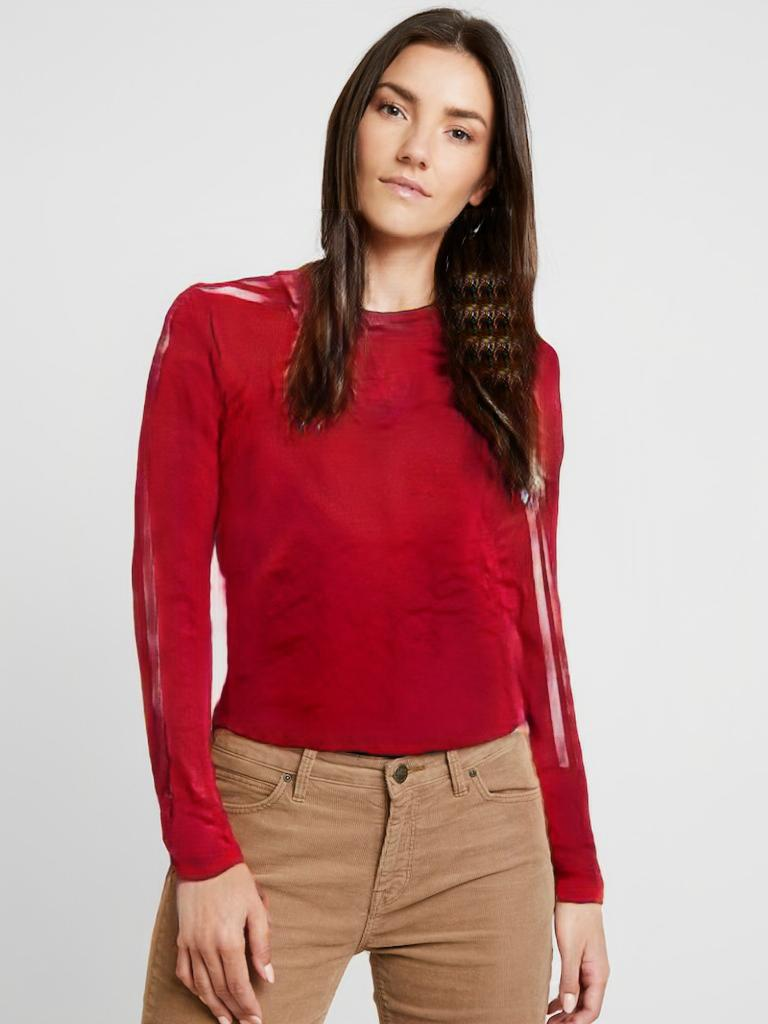

In [8]:
from IPython.display import Image, display

# ▼▼▼ PASTE THE CORRECT PATH FROM THE SEARCH RESULTS ABOVE ▼▼▼
correct_image_path = "./results/final_vton_run/00057_00008_00.jpg"
# ▲▲▲ PASTE THE CORRECT PATH FROM THE SEARCH RESULTS ABOVE ▲▲▲

print("Displaying your final Virtual Try-On image:")
display(Image(filename=correct_image_path, width=384))

In [14]:
import os
os.chdir("/kaggle/working/VITON-HD")

# ===================================================================
# Part 1: CHOOSE YOUR NEW IMAGES
# ===================================================================
# ▼▼▼ CHOOSE A NEW PAIR OF FILENAMES ▼▼▼
person_image = "00074_00.jpg"  # Replace with another person's image file
cloth_image = "00071_00.jpg"   # Replace with another clothing file
# ▲▲▲ CHOOSE A NEW PAIR OF FILENAMES ▲▲▲

# ===================================================================
# Part 2: Run the Model on the New Pair
# ===================================================================
# We use a new run name to keep results separate
run_name = "second_pair_run"

with open("./datasets/test_one_pair.txt", "w") as f:
    f.write(f"{person_image} {cloth_image}")

print(f"✅ Created test file to try on '{cloth_image}' with model '{person_image}'")
print("\n▶️ Starting the virtual try-on process...")

os.system(f"""
python test.py \
    --name "{run_name}" \
    --dataset_dir ./datasets \
    --dataset_list "test_one_pair.txt"
""")

print("-" * 50)
print(f"🎉 Process finished! Results are in './results/{run_name}/'")

✅ Created test file to try on '00071_00.jpg' with model '00074_00.jpg'

▶️ Starting the virtual try-on process...
Namespace(name='second_pair_run', batch_size=1, workers=1, load_height=1024, load_width=768, shuffle=False, dataset_dir='./datasets', dataset_mode='test', dataset_list='test_one_pair.txt', checkpoint_dir='./checkpoints/', save_dir='./results/', display_freq=1, seg_checkpoint='seg_final.pth', gmm_checkpoint='gmm_final.pth', alias_checkpoint='alias_final.pth', semantic_nc=13, init_type='xavier', init_variance=0.02, grid_size=5, norm_G='spectralaliasinstance', ngf=64, num_upsampling_layers='most')
Network [SegGenerator] was created. Total number of parameters: 34.5 million. To see the architecture, do print(network).
Network [ALIASGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).


/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5015: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


step: 1
--------------------------------------------------
🎉 Process finished! Results are in './results/second_pair_run/'


In [11]:
# This command will find all JPG images inside your results folder
print("🔎 Searching for output images...")
!find ./results/final_vton_run -name "*.jpg"

🔎 Searching for output images...
./results/final_vton_run/00057_00008_00.jpg


In [15]:
# This command will find all JPG images inside your new results folder
print("🔎 Searching for output images from 'second_pair_run'...")
!find ./results/second_pair_run -name "*.jpg"

🔎 Searching for output images from 'second_pair_run'...
./results/second_pair_run/00074_00096_00.jpg
./results/second_pair_run/00074_00071_00.jpg


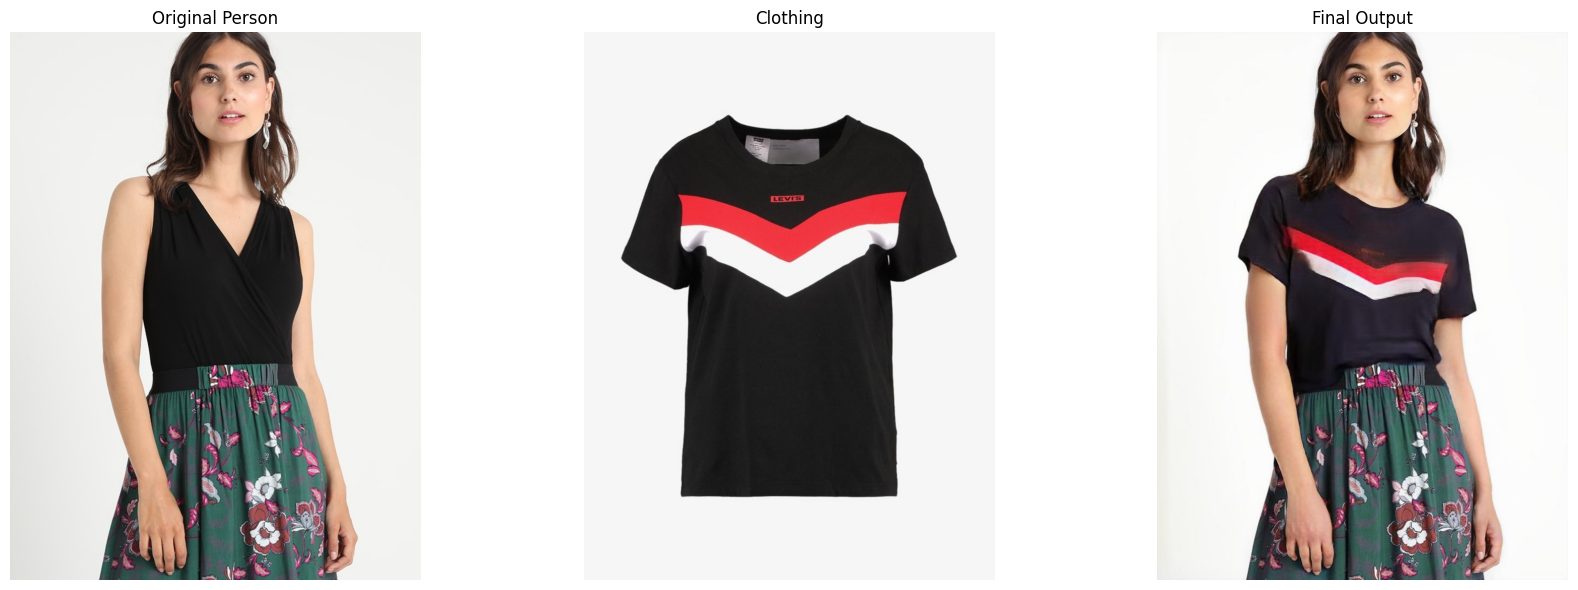

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# ===================================================================
# Configure the filenames from the run above
# ===================================================================
# ▼▼▼ Make sure these match the files you just ran ▼▼▼
person_filename = "00074_00.jpg"
cloth_filename = "00071_00.jpg"
run_name = "second_pair_run"
# ▲▲▲ Make sure these match the files you just ran ▲▲▲

# ===================================================================
# Define paths and display images
# ===================================================================
# Define the paths to the three images
person_path = os.path.join("./datasets/test/image/", person_filename)
cloth_path = os.path.join("./datasets/test/cloth/", cloth_filename)
output_path = "./results/second_pair_run/00074_00071_00.jpg"

# Create a figure to display the images
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display Original Person
try:
    person_img = mpimg.imread(person_path)
    axes[0].imshow(person_img)
    axes[0].set_title('Original Person')
except FileNotFoundError:
    axes[0].text(0.5, 0.5, 'Person Image\nNot Found', ha='center', va='center')
    axes[0].set_title('Original Person')
finally:
    axes[0].axis('off')

# Display Clothing
try:
    cloth_img = mpimg.imread(cloth_path)
    axes[1].imshow(cloth_img)
    axes[1].set_title('Clothing')
except FileNotFoundError:
    axes[1].text(0.5, 0.5, 'Cloth Image\nNot Found', ha='center', va='center')
    axes[1].set_title('Clothing')
finally:
    axes[1].axis('off')

# Display Final Output
try:
    output_img = mpimg.imread(output_path)
    axes[2].imshow(output_img)
    axes[2].set_title('Final Output')
except FileNotFoundError:
    axes[2].text(0.5, 0.5, 'Output Image\nNot Found', ha='center', va='center')
    axes[2].set_title('Final Output')
finally:
    axes[2].axis('off')

plt.tight_layout()
plt.show()